<img src="z.gif" alt="Alt text that describes the graphic" title="Title text" />

# Zomato Data Analysis

Importing the required libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np
from pandas import ExcelWriter
#plt.style.use('ggplot')
from pandas import ExcelWriter

Reading the main dataframe and the one with country codes

In [2]:
df = pd.read_csv("/Users/rushabh/Rushabh/Untitled Folder/Datasets/zomato-restaurants-data/zomato.csv")
df_country_codes = pd.read_excel("/Users/rushabh/Rushabh/Untitled Folder/Datasets/zomato-restaurants-data/Country-Code.xlsx")

Basic analysis of the datasets

In [6]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df_country_codes.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


Let's merge the two datasets above. We use 'left' join to merge the columns.

In [10]:
df = pd.merge(left=df, right=df_country_codes, on='Country Code', how='left')

We can see that we have a new 'Country' column.

In [13]:
df.columns

Index([       u'Restaurant ID',      u'Restaurant Name',
               u'Country Code',                 u'City',
                    u'Address',             u'Locality',
           u'Locality Verbose',            u'Longitude',
                   u'Latitude',             u'Cuisines',
       u'Average Cost for two',             u'Currency',
          u'Has Table booking',  u'Has Online delivery',
          u'Is delivering now', u'Switch to order menu',
                u'Price range',     u'Aggregate rating',
               u'Rating color',          u'Rating text',
                      u'Votes',              u'Country'],
      dtype='object')

Rearranging the columns so that 'Country' column is next to 'City'

In [16]:
df=df[['Restaurant ID','Restaurant Name', 'Country Code', 'City',
        'Country', 'Address', 'Locality', 'Locality Verbose', 
        'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 
        'Currency', 'Has Table booking', 'Has Online delivery', 
        'Is delivering now', 'Switch to order menu', 'Price range', 
        'Aggregate rating', 'Rating color', 'Rating text', 'Votes']]
df.columns

Index([       u'Restaurant ID',      u'Restaurant Name',
               u'Country Code',                 u'City',
                    u'Country',              u'Address',
                   u'Locality',     u'Locality Verbose',
                  u'Longitude',             u'Latitude',
                   u'Cuisines', u'Average Cost for two',
                   u'Currency',    u'Has Table booking',
        u'Has Online delivery',    u'Is delivering now',
       u'Switch to order menu',          u'Price range',
           u'Aggregate rating',         u'Rating color',
                u'Rating text',                u'Votes'],
      dtype='object')

In [11]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


The only relevant columns above are 'Price range', 'Aggregate Rating' and 'Votes' 

In votes, we see that theres a VERY big difference between the max and mean count. 
Lets see what restaurant is that.

In [17]:
df[df['Votes']==10934]

,Restaurant ID,Restaurant Name,Country Code,City,Country,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
728,51705,Toit,1,Bangalore,India,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,...,Indian Rupees(Rs.),No,No,No,No,4,4.8,Dark Green,Excellent,10934


First, we will find the number of null values in our data

In [106]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Country                 0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [103]:
df[df['Cuisines'].isnull()]

null_cuisines_index=df[df['Cuisines'].isnull()].index

The above restaurants have no entries in their 'Cuisines' column. The best solution here is to categorize them as 'American' cuisines.

In [105]:
#Filling out the null values in 'Cuisines' column

df.loc[null_cuisines_index,'Cuisines']='American'

Let's explore the 'Country' column a little bit.

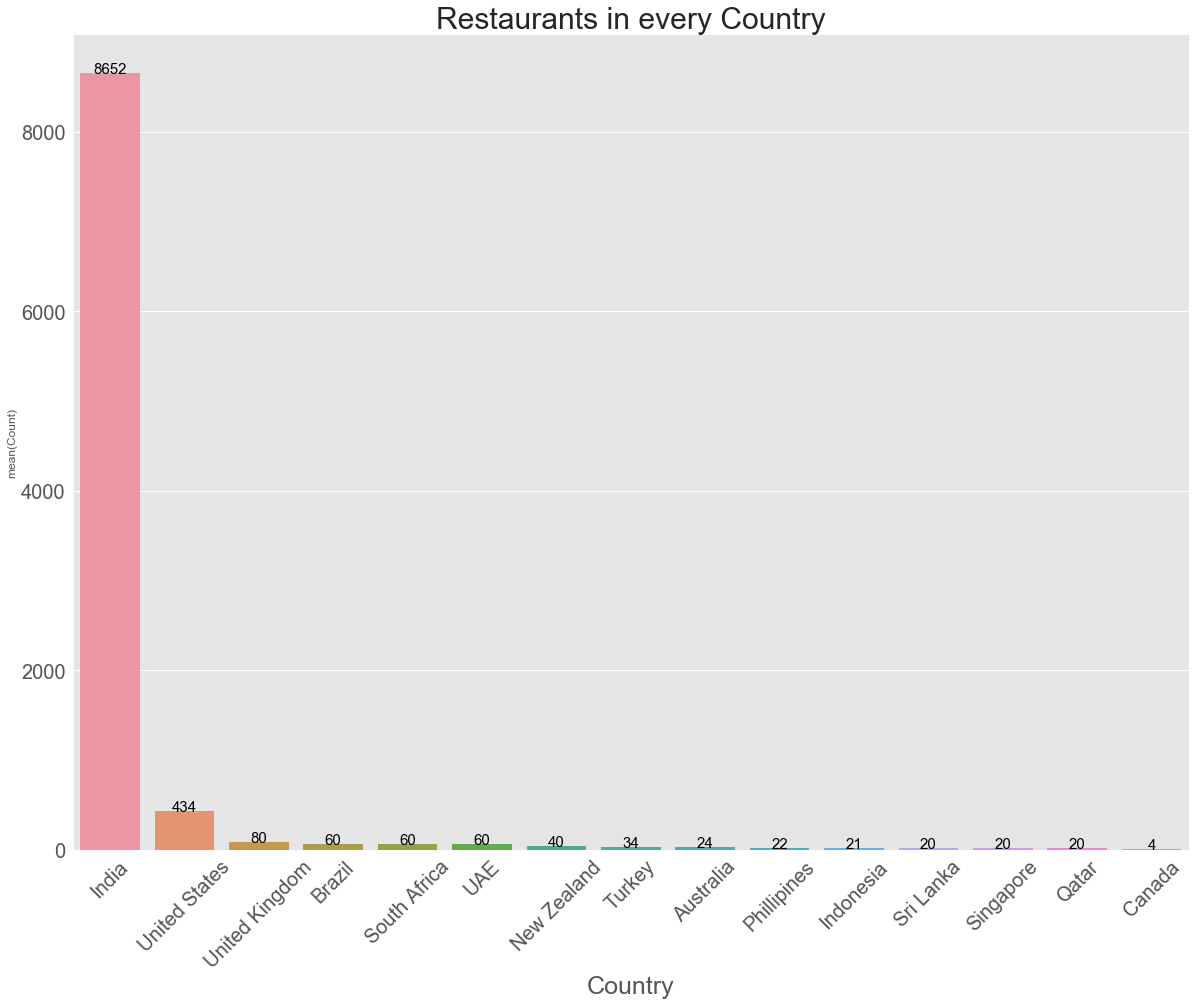

In [108]:
#Making a Country counts dataset
country_count_df = pd.DataFrame(df.Country.value_counts(),).reset_index()
country_count_df.columns=['Country','Count']

#Plotting the above
plt.figure(figsize=(20,15))
sns.barplot(country_count_df.Country, country_count_df.Count)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.title("Restaurants in every Country", fontsize=30)
plt.xlabel("Country", fontsize=25)
x=0
for i in country_count_df.values:
    plt.text(x, i[1], i[1], color='black', ha="center", fontsize=15)
    x+=1

plt.show()

India clearly dominates the dataset with 8,600 entries.

The plot below helps us have a look at the average ratings in each country.

In [68]:
country_rating = df.groupby('Country', as_index=False)['Aggregate rating'].mean()
country_rating.columns = ['Country','Rating']

#Sorting by Average Ratings
country_rating=country_rating.sort_values(by=['Rating'], ascending=False)
#Rounding off the ratings
country_rating['Rating'] = country_rating['Rating'].apply(lambda x: round(x,2))

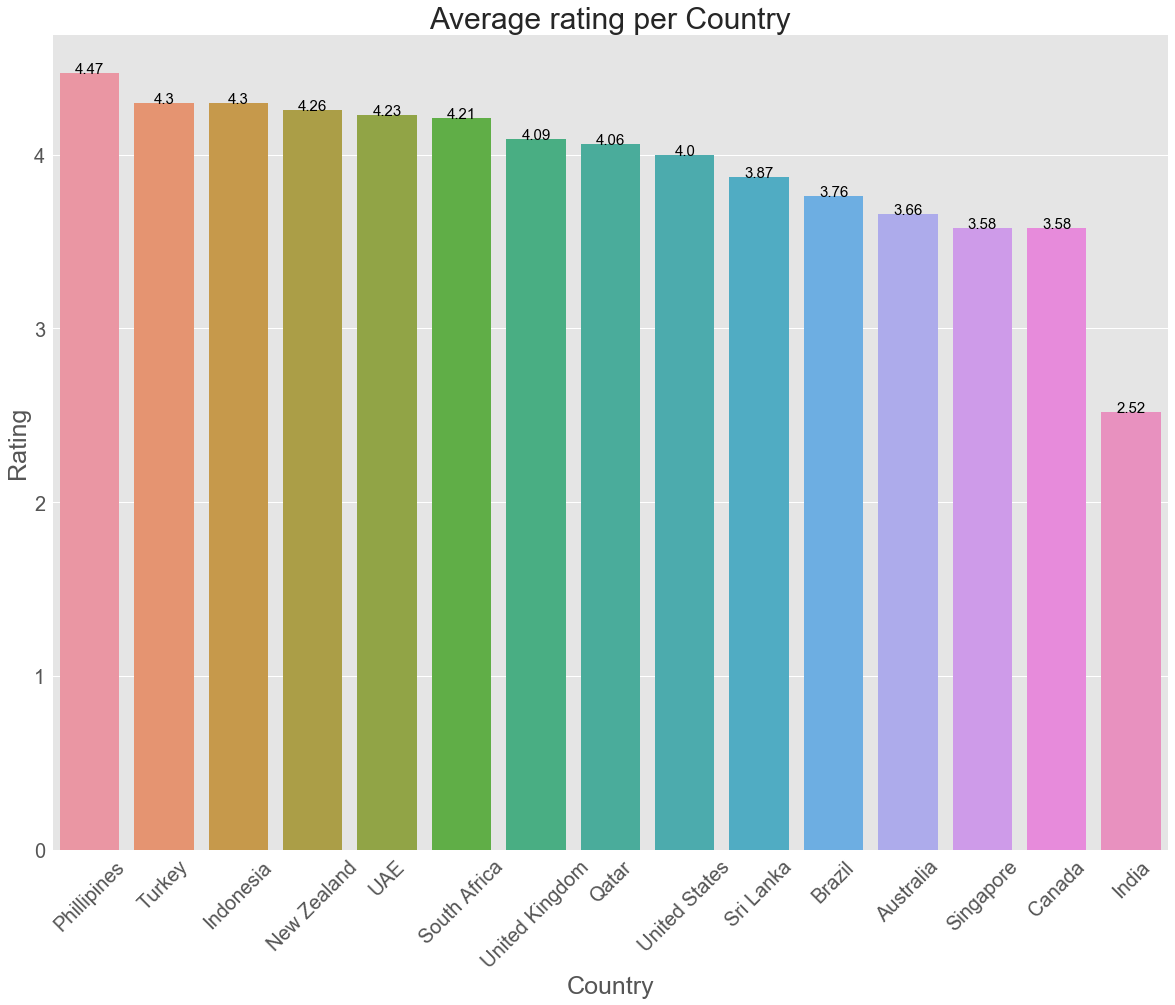

In [69]:
plt.figure(figsize=(20,15))
sns.barplot(country_rating.Country, country_rating.Rating)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.title("Average Ratings per Country", fontsize=30)
plt.xlabel("Country", fontsize=25)
plt.ylabel('Rating', fontsize=25)
x=0
for i in country_rating.values:
    plt.text(x, i[1], i[1], color='black', ha="center", fontsize=15)
    x+=1

plt.show()

KeyboardInterrupt: 

In [ ]:
country_cost = df.groupby('Country', as_index=False)['Price range'].mean()
country_cost.columns = ['Country','Price']

#Sorting by Average Ratings
country_cost=country_cost.sort_values(by=['Price'], ascending=False)
#Rounding off the ratings
country_cost['Price'] = country_cost['Price'].apply(lambda x: round(x,2))

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(country_cost.Country, country_cost.Price, palette="Set2")
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.title("Average Cost per Country", fontsize=30)
plt.xlabel("Country", fontsize=25)
plt.ylabel('Cost', fontsize=25)
x=0
for i in country_cost.values:
    plt.text(x, i[1], i[1], color='black', ha="center", fontsize=15)
    x+=1

plt.show()

A very interesting part of the analysis would be to see how does columns like 'Has Table booking' and 'Has Online delivery' affect the aggregate rating of a restaurant.

In [ ]:
table_yes_no_avg_rating = df.groupby(['Country','Has Table booking'], as_index=False)['Aggregate rating'].mean()

In [107]:
df.columns

Index([       u'Restaurant ID',      u'Restaurant Name',
               u'Country Code',                 u'City',
                    u'Country',              u'Address',
                   u'Locality',     u'Locality Verbose',
                  u'Longitude',             u'Latitude',
                   u'Cuisines', u'Average Cost for two',
                   u'Currency',    u'Has Table booking',
        u'Has Online delivery',    u'Is delivering now',
       u'Switch to order menu',          u'Price range',
           u'Aggregate rating',         u'Rating color',
                u'Rating text',                u'Votes'],
      dtype='object')

Coincidentally, India is at the extremes in both the cases. 

Let's explore the City column a bit

In [18]:
df['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
Ahmedabad             21
Bhubaneshwar          21
Lucknow               21
Amritsar              21
Guwahati              21
Nagpur                20
Orlando               20
Ranchi                20
Dubai                 20
Valdosta              20
Allahabad             20
Edinburgh             20
Surat                 20
Manchester            20
Savannah              20
Columbus              20
Vizag                 20
Bangalore             20
Rio de Janeiro        20
Sharjah               20
Indore                20
Birmingham            20
Boise                 20
Dehradun              20
Dalton                20
                    ... 
Montville              1
Armidale               1
East Ballina           1
Chatham-Kent           1
Lakes Entrance         1
Winchester Bay         1
Panchkula              1
Lincoln                1
Penola                 1


Woah! This is totall dominated by Indian cities. How about we exclude Indian cities?

In [34]:
city_df=pd.DataFrame(df[df['Country']!='India']['City'].value_counts()).reset_index()
city_df.columns=['City','Count']

city_df.head(20)

,City,Count
0,Athens,20
1,Waterloo,20
2,Sharjah,20
3,Abu Dhabi,20
4,Ankara,20
5,Augusta,20
6,Doha,20
7,Dubai,20
8,Orlando,20
9,Bras�_lia,20


'Brasilia' may cause problems while plotting values. Let's find the index and change the values.

In [42]:
df[df['City'].str.contains("lia", na=False)]['City']

22    Bras�_lia
23    Bras�_lia
24    Bras�_lia
25    Bras�_lia
26    Bras�_lia
27    Bras�_lia
28    Bras�_lia
29    Bras�_lia
30    Bras�_lia
31    Bras�_lia
32    Bras�_lia
33    Bras�_lia
34    Bras�_lia
35    Bras�_lia
36    Bras�_lia
37    Bras�_lia
38    Bras�_lia
39    Bras�_lia
40    Bras�_lia
41    Bras�_lia
Name: City, dtype: object

In [43]:
df.loc[22:41,'City']='Brasilia'

In [44]:
df[df['City'].str.contains("lia", na=False)]['City']

22    Brasilia
23    Brasilia
24    Brasilia
25    Brasilia
26    Brasilia
27    Brasilia
28    Brasilia
29    Brasilia
30    Brasilia
31    Brasilia
32    Brasilia
33    Brasilia
34    Brasilia
35    Brasilia
36    Brasilia
37    Brasilia
38    Brasilia
39    Brasilia
40    Brasilia
41    Brasilia
Name: City, dtype: object

In [49]:
city_df=pd.DataFrame(df[df['Country']!='India']['City'].value_counts()).reset_index()
city_df.columns=['City','Count']

city_df.head(50)

,City,Count
0,Wellington City,20
1,Pensacola,20
2,Tampa Bay,20
3,Sharjah,20
4,Valdosta,20
5,Augusta,20
6,Ankara,20
7,Orlando,20
8,Brasilia,20
9,Pocatello,20


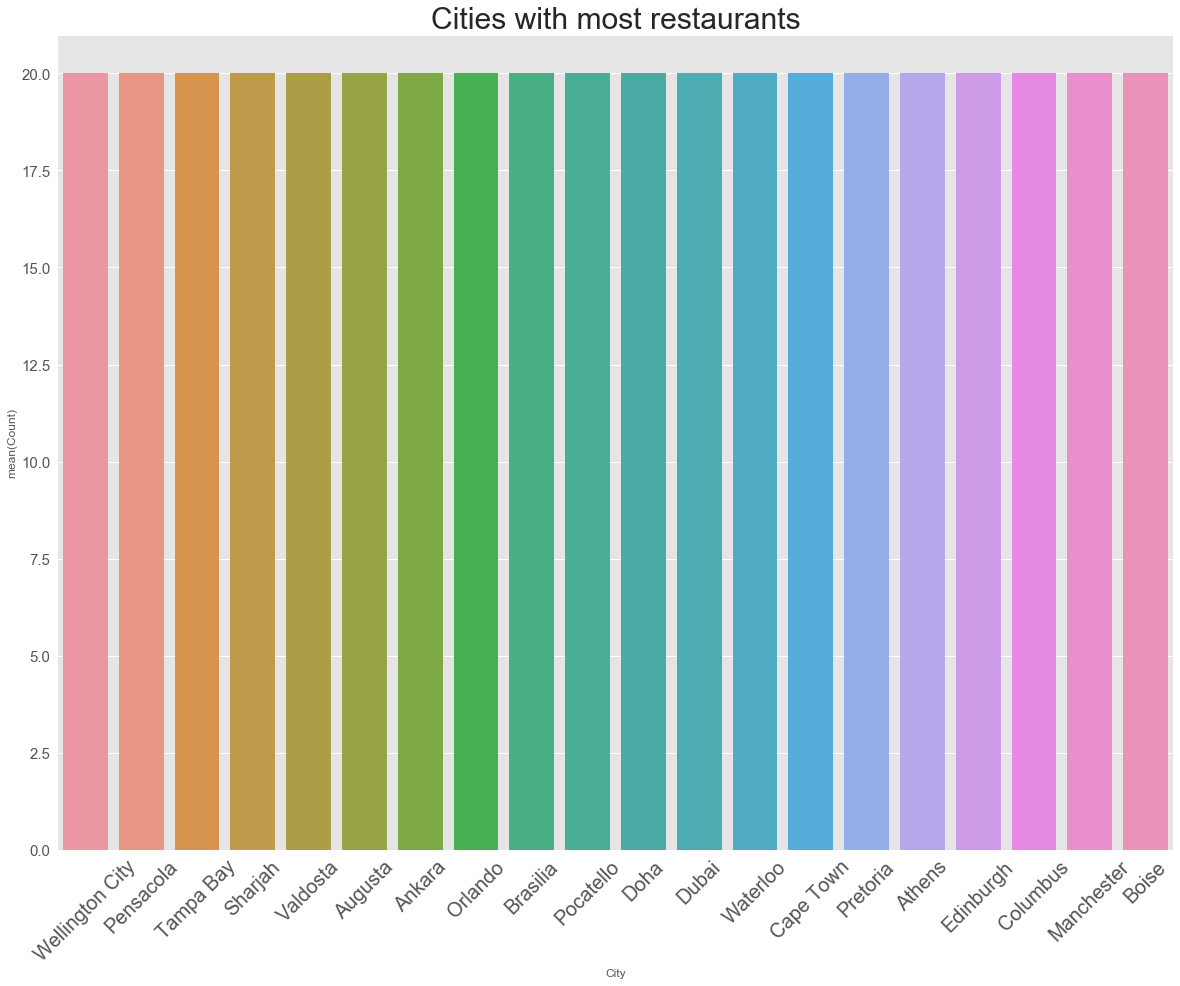

In [51]:
plt.figure(figsize=(20,15))
sns.barplot(city_df.City.head(20), city_df.Count.head(20))
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=15)
plt.title("Cities with most restaurants", fontsize=30)
x=0

#for i in city_df.values:
#    plt.text(x, i[1], i[1], color='black', ha="center", fontsize=15)
#    x+=1

plt.show()